In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('flights_data.csv')

# Handle missing values
df.dropna(inplace=True)  # This is a simple drop. Depending on context, you may want to fill or interpolate.

# Statistical summary
print(df.describe())

# Shape and structure
print("Shape:", df.shape)
print("\nData types:", df.dtypes)

C:\Users\HP\AppData\Local\Temp\ipykernel_19988\1813452545.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights_data.csv')


       FLIGHT_NUMBER         MONTH           DAY   DAY_OF_WEEK  \
count   5.714008e+06  5.714008e+06  5.714008e+06  5.714008e+06   
mean    2.164384e+03  6.547799e+00  1.570759e+01  3.932643e+00   
std     1.754706e+03  3.397421e+00  8.774394e+00  1.985967e+00   
min     1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%     7.280000e+02  4.000000e+00  8.000000e+00  2.000000e+00   
50%     1.681000e+03  7.000000e+00  1.600000e+01  4.000000e+00   
75%     3.211000e+03  9.000000e+00  2.300000e+01  6.000000e+00   
max     9.320000e+03  1.200000e+01  3.100000e+01  7.000000e+00   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
count         5.714008e+06    5.714008e+06       5.714008e+06  5.714008e+06   
mean          1.328907e+03    1.335066e+03       1.493187e+03  1.476373e+03   
std           4.835251e+02    4.964198e+02       5.069011e+02  5.259730e+02   
min           1.000000e+00    1.000000e+00       1.000000e+00  1.000000e+00   
25%       

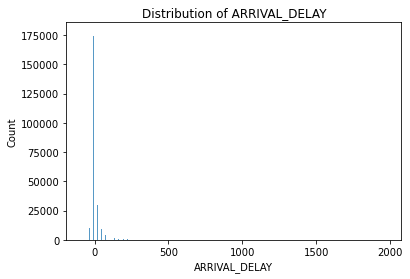

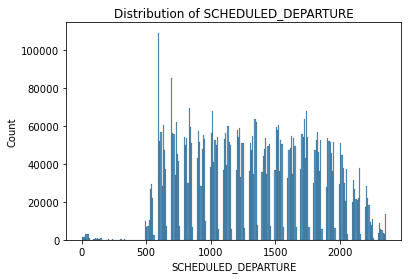

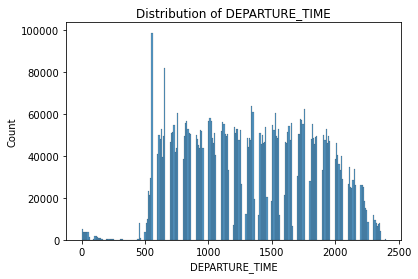

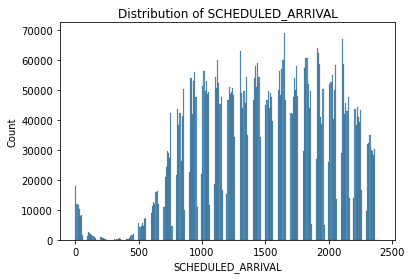

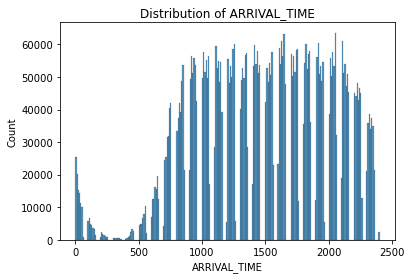

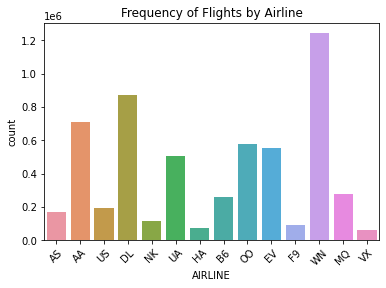

In [9]:

# Distribution for numeric features
for col in ['ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']:
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Frequency for categorical variables
sns.countplot(x='AIRLINE', data=df)
plt.title('Frequency of Flights by Airline')
plt.xticks(rotation=45)
plt.show()

In [10]:
print(df.head())
print(df.describe())

# Percentage of flights delayed more than 15 minutes
percentage_delayed = (len(df[df["ARRIVAL_DELAY"] > 15]) / len(df)) * 100
print(f"Percentage of flights delayed by more than 15 minutes: {percentage_delayed:.2f}%")


   FLIGHT_NUMBER  MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT  \
0             98      1    1            4      AS            ANC   
1           2336      1    1            4      AA            LAX   
2            840      1    1            4      US            SFO   
3            258      1    1            4      AA            LAX   
4            135      1    1            4      AS            SEA   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  SCHEDULED_ARRIVAL  \
0                 SEA                    5          2354.0                430   
1                 PBI                   10             2.0                750   
2                 CLT                   20            18.0                806   
3                 MIA                   20            15.0                805   
4                 ANC                   25            24.0                320   

   ARRIVAL_TIME  ARRIVAL_DELAY  
0         408.0          -22.0  
1         741.0           -9.0  
2    

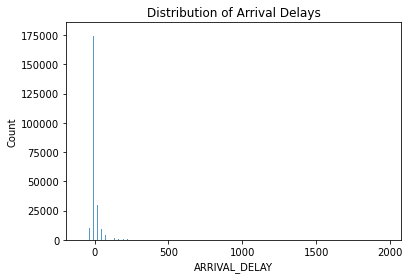

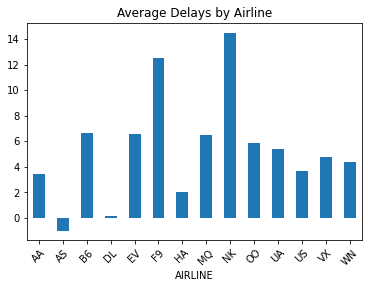

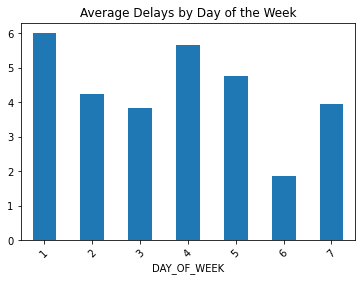

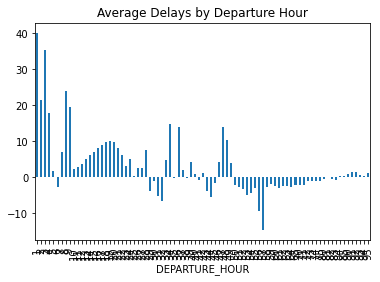

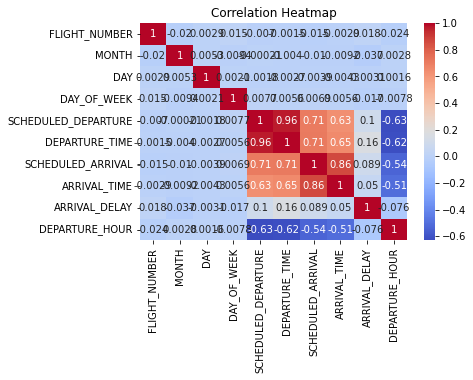

In [12]:
# 4. Visual Analysis:

# Distribution of flight delays
sns.histplot(df['ARRIVAL_DELAY'])
plt.title('Distribution of Arrival Delays')
plt.show()

# Average delays across airlines
avg_delays = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
avg_delays.plot(kind='bar', title='Average Delays by Airline')
plt.xticks(rotation=45)
plt.show()

# Impact of day of the week on delays
day_delays = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()
day_delays.plot(kind='bar', title='Average Delays by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Scheduled departure hour pattern
df['DEPARTURE_HOUR'] = df['SCHEDULED_DEPARTURE'].apply(lambda x: int(str(x)[:2]))  # Assuming HHMM format
hourly_delays = df.groupby('DEPARTURE_HOUR')['ARRIVAL_DELAY'].mean()
hourly_delays.plot(kind='bar', title='Average Delays by Departure Hour')
plt.show()

# Correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

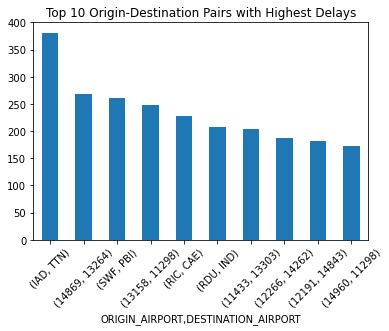

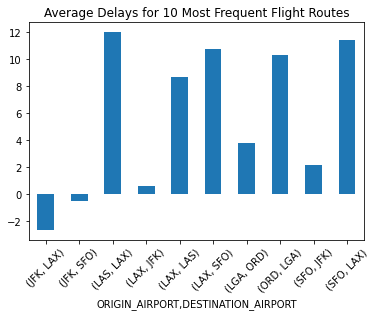

In [13]:
# 5. Deep Dive Analysis:

# Origin-destination pairs with highest average delays
pairs_delays = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean().nlargest(10)
pairs_delays.plot(kind='bar', title='Top 10 Origin-Destination Pairs with Highest Delays')
plt.xticks(rotation=45)
plt.show()

# Most frequent flight routes and their average delays
top_routes = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).size().nlargest(10).index
top_routes_delays = df[df.set_index(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).index.isin(top_routes)].groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['ARRIVAL_DELAY'].mean()
top_routes_delays.plot(kind='bar', title='Average Delays for 10 Most Frequent Flight Routes')
plt.xticks(rotation=45)
plt.show()